<a href="https://colab.research.google.com/github/jdhenaos/DL_excercises/blob/main/CNN_cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install datasets

#huggingface-cli login

from datasets import load_dataset
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

ds = load_dataset("microsoft/cats_vs_dogs")

In [28]:
ds['train'][1]['image'].size

(300, 281)

In [10]:
cats = [ds['train'][x] for x in range(len(ds['train'])) if ds['train'][x]['labels'] == 0 ]
dogs = [ds['train'][x] for x in range(len(ds['train'])) if ds['train'][x]['labels'] == 1 ]

del ds

0


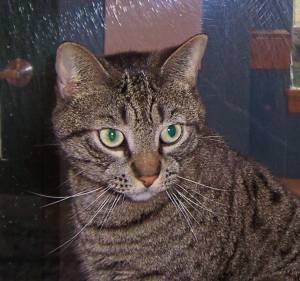

In [11]:
print(cats[1]['labels'])
cats[1]['image']

1


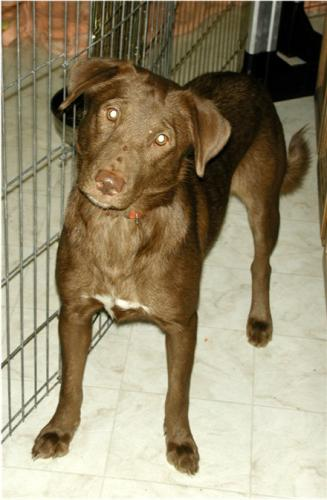

In [12]:
print(dogs[1]['labels'])
dogs[1]['image']

In [13]:
print(len(cats))
print(len(dogs))

cats = cats[:10000]
dogs = dogs[:10000]

print(len(cats))
print(len(dogs))

train_ds = cats[:7000] + dogs[:7000]
test_ds = cats[7000:] + dogs[7000:]

print(len(train_ds))
print(len(test_ds))

del cats
del dogs

11741
11669
10000
10000
14000
6000


In [14]:
def preprocess(dataset):
  image = np.array(dataset['image'].resize((224, 224)))
  if image.ndim == 2:
    image = np.expand_dims(image, axis=-1)
  image = (image/255.).astype(np.float32)
  label = np.array(dataset['labels']).astype(np.int64)
  return image, label

train_images = []
train_labels = []
test_images = []
test_labels = []

for i in range(len(train_ds)):
    # Check each step to identify potential errors
    image, label = preprocess(train_ds[i])
    train_images.append(image)
    train_labels.append(label)

del train_ds

for i in range(len(test_ds)):
    # Check each step to identify potential errors
    image, label = preprocess(test_ds[i])
    test_images.append(image)
    test_labels.append(label)

del test_ds

train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (14000,) + inhomogeneous part.

In [23]:
train_images[i+1]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.99607843, 0.99607843, 0.9882353 ],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0